# Partie 2

In [ ]:
from math import pi, sin, tan, atan
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt

t0, tf = 0, 100 # s
v0 = 10 # m/s
a, b = 1.1, 3.3 # m

y0, theta0 = 0, 0
t_interval = np.linspace(0, 100, 1000000)


A = np.matrix([[0, v0], 
               [0, 0]])

B = np.matrix([[(a/b)*v0],
               [v0/b]] )

C = np.matrix([1, 0])
D = np.matrix([0])

# 3. Control loop

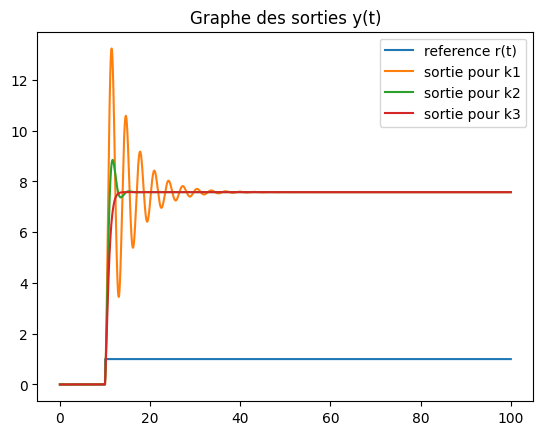

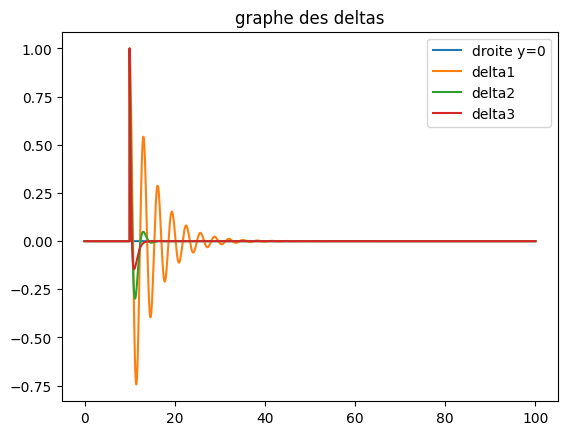

In [2]:
k_r = 1 


K_1 = np.matrix([[0.132, -0.0132]])
K_2 = np.matrix([[0.132, 0.5148]])
K_3 = np.matrix([[0.132, 1.1088]])


def syst_controle(t, y, r, K):
    Y = np.matrix([[y[0]], 
                   [y[1]]])
    # on calcule directement les 2 variables d'état
    matrice = np.matmul( (A-np.matmul(B,K)) , Y )  + ( (k_r*B) * r(t)  ) # ici (A-K*B) = A_tilde et (k_r*B) = B_tilde

    dy = matrice[0,0]
    dtheta = matrice[1,0]
    
    return dy, dtheta

def fonction_echellon(t):
    return t>= 0

def r_echellon(t):
    return fonction_echellon(t-10)



sortie_cible = r_echellon(t_interval)

sol_controle_1 = sc.integrate.solve_ivp(syst_controle, [t0, tf], [y0, theta0], t_eval = t_interval, args=[r_echellon, K_1])
sol_controle_2 = sc.integrate.solve_ivp(syst_controle, [t0, tf], [y0, theta0], t_eval = t_interval, args=[r_echellon, K_2])
sol_controle_3 = sc.integrate.solve_ivp(syst_controle, [t0, tf], [y0, theta0], t_eval = t_interval, args=[r_echellon, K_3])


delta_matrice_1 = - (K_1 @ sol_controle_1["y"]) + (k_r * sortie_cible)
delta_matrice_2 = - (K_2 @ sol_controle_2["y"]) + (k_r * sortie_cible)
delta_matrice_3 = - (K_3 @ sol_controle_3["y"]) + (k_r * sortie_cible)

delta_tableau_1 = np.squeeze(np.asarray(delta_matrice_1)) # on passe sous forme de tableau pour utiliser matplotlib
delta_tableau_2 = np.squeeze(np.asarray(delta_matrice_2))
delta_tableau_3 = np.squeeze(np.asarray(delta_matrice_3))


plt.figure()
plt.plot(t_interval, sortie_cible, label='reference r(t)')
plt.plot(sol_controle_1["t"], sol_controle_1["y"][0], label ='sortie pour k1')
plt.plot(sol_controle_2["t"], sol_controle_2["y"][0], label ='sortie pour k2')
plt.plot(sol_controle_3["t"], sol_controle_3["y"][0], label ='sortie pour k3')
plt.title("Graphe des sorties y(t)")
plt.legend()
plt.show()


plt.figure()
plt.plot(t_interval, np.zeros_like(t_interval), label = 'droite y=0')
plt.plot(t_interval, delta_tableau_1, label='delta1')
plt.plot(t_interval, delta_tableau_2, label='delta2')
plt.plot(t_interval, delta_tableau_3, label='delta3')
plt.title("graphe des deltas")
plt.legend()
plt.show()



# 4. Simulation


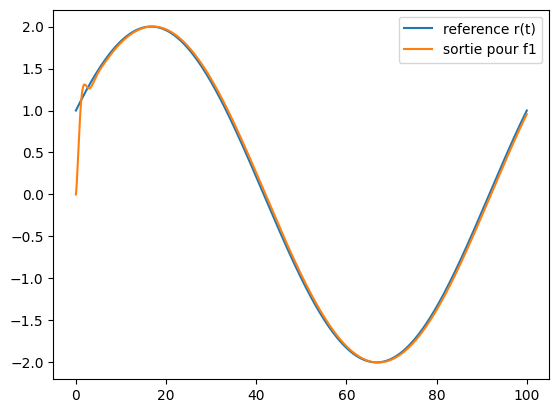

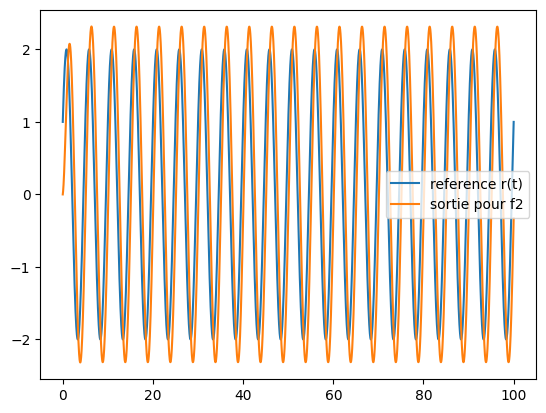

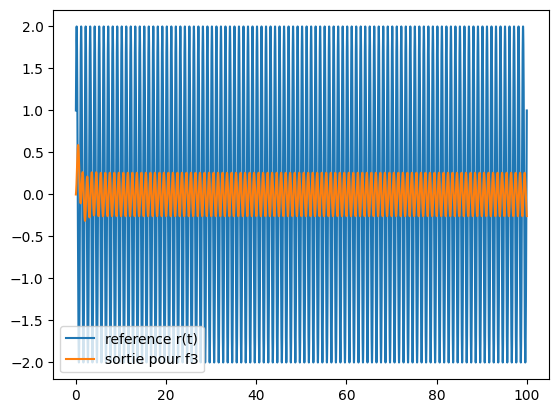

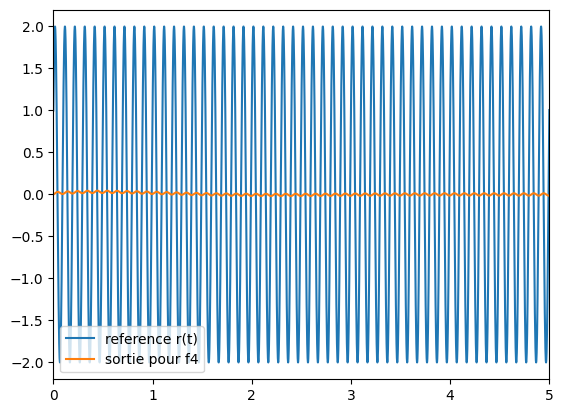

In [14]:
def r_sinus(t, f):
    return 2 * np.sin( (2*np.pi*f*t) + np.pi/6)


f1 = 0.01 # Hz
f2 = 0.2
f3 = 1
f4 = 10

t_interval = np.linspace(0, 100, 100000)

K = np.matrix([[0.132, 0.5148]])
k_r = 0.132

sol_simu_f1 = sc.integrate.solve_ivp(syst_controle, [t0, tf], [y0, theta0], t_eval = t_interval, args=[lambda t: r_sinus(t, f1), K])
sol_simu_f2 = sc.integrate.solve_ivp(syst_controle, [t0, tf], [y0, theta0], t_eval = t_interval, args=[lambda t: r_sinus(t, f2), K])

#t_interval = np.linspace(0, 100, 1000000)
sol_simu_f3 = sc.integrate.solve_ivp(syst_controle, [t0, tf], [y0, theta0], t_eval = t_interval, args=[lambda t: r_sinus(t, f3), K])
sol_simu_f4 = sc.integrate.solve_ivp(syst_controle, [t0, tf], [y0, theta0], t_eval = t_interval, args=[lambda t: r_sinus(t, f4), K])

plt.figure()
plt.plot(t_interval, r_sinus(t_interval, f1), label='reference r(t)')
plt.plot(sol_simu_f1["t"], sol_simu_f1["y"][0], label ='sortie pour f1')


plt.legend()
plt.show()


plt.figure()
plt.plot(t_interval, r_sinus(t_interval, f2), label='reference r(t)')   
plt.plot(sol_simu_f2["t"], sol_simu_f2["y"][0], label ='sortie pour f2')
plt.legend()
plt.show()

plt.figure()
plt.plot(t_interval, r_sinus(t_interval, f3), label='reference r(t)')
plt.plot(sol_simu_f3["t"], sol_simu_f3["y"][0], label ='sortie pour f3')
plt.legend()
plt.show()

plt.figure()
plt.plot(t_interval, r_sinus(t_interval, f4), label='reference r(t)')
plt.plot(sol_simu_f4["t"], sol_simu_f4["y"][0], label ='sortie pour f4')
plt.xlim(0,5)
plt.legend()
plt.show()

### 5. Représentation de Fourier

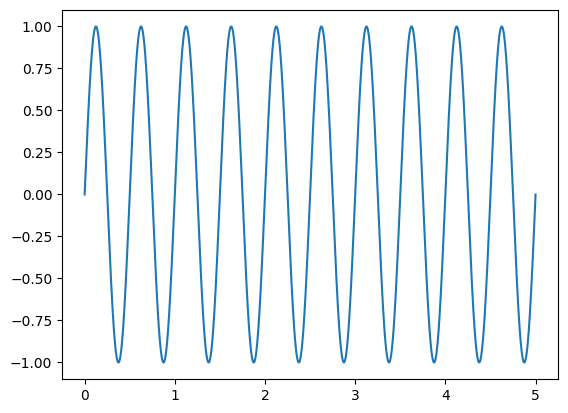

In [15]:
import numpy as np
from matplotlib import pyplot as plt

SAMPLE_RATE = 44100  # Hertz
DURATION = 5  # Seconds

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

# Generate a 2 hertz sine wave that lasts for 5 seconds
x, y = generate_sine_wave(2, SAMPLE_RATE, DURATION)
plt.plot(x, y)
plt.show()


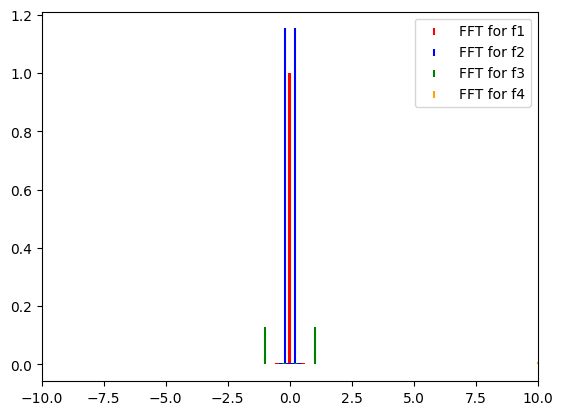

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


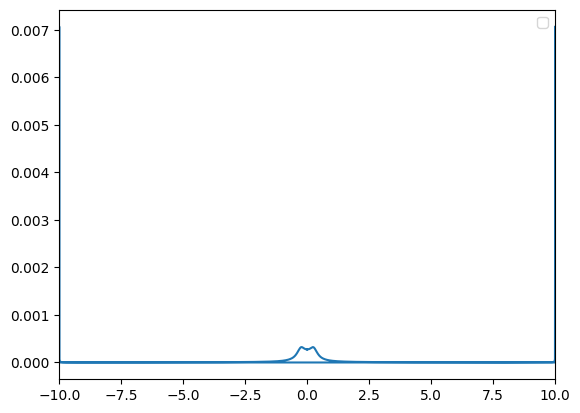

In [16]:
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
import numpy as np

# Define a colormap
colors = ['red', 'blue', 'green', 'orange']

for i, sol_simu in enumerate([sol_simu_f1, sol_simu_f2, sol_simu_f3, sol_simu_f4]):
    y = sol_simu["y"][0]
    x = sol_simu["t"]

    N = len(y)
    SAMPLE_RATE = N / 100
    yf = fft(y)
    xf = fftfreq(N, 1 / SAMPLE_RATE)

    yf = np.where(np.abs(yf) > 100, yf, 0)
    yf = np.abs(yf) / N  # Normalization

    plt.stem(xf, np.abs(yf), markerfmt=' ', basefmt=' ', linefmt=colors[i], label=f'FFT for f{i+1}')
    

plt.xlim(-10, 10)
plt.legend()
plt.show()



y = sol_simu_f4["y"][0]
x = sol_simu_f4["t"]

N = len(y)
SAMPLE_RATE = N / 100
yf = fft(y)
xf = fftfreq(N, 1 / SAMPLE_RATE)

# yf = np.where(np.abs(yf) > 100, yf, 0)
yf = np.abs(yf) / N  # Normalization

#plt.stem(xf, np.abs(yf), markerfmt=' ', basefmt=' ', linefmt='black', label=f'FFT')
plt.plot(xf, np.abs(yf))
plt.legend()
plt.xlim(-10, 10)
plt.show()